<a href="https://colab.research.google.com/github/TheSpiralArchitect/Phase-1-/blob/main/SRL_Cosine_Similarity_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Define expected SRL symbolic stream paths
paths = {
    "Cosmic": "/content/drive/MyDrive/SRL_Symbols/cosmic_symbolic_stream.npy",
    "EEG": "/content/drive/MyDrive/SRL_Symbols/eeg_symbolic_stream.npy",
    "Quantum": "/content/drive/MyDrive/SRL_Symbols/quantum_symbolic_stream.npy",
    "GRN": "/content/drive/MyDrive/SRL_Phase2_Biological/symbols/grn_symbolic_stream.npy",
    "Social": "/content/drive/MyDrive/SRL_Phase2_Social/symbols/social_symbolic_stream.npy"
}

print("SRL Symbolic Stream File Check:")
print("-" * 50)
for label, path in paths.items():
    if os.path.exists(path):
        size_kb = os.path.getsize(path) / 1024
        print(f"{label:8}: FOUND ({size_kb:.1f} KB) → {path}")
    else:
        print(f"{label:8}: MISSING → {path}")

SRL Symbolic Stream File Check:
--------------------------------------------------
Cosmic  : FOUND (2086.7 KB) → /content/drive/MyDrive/SRL_Symbols/cosmic_symbolic_stream.npy
EEG     : FOUND (3906.4 KB) → /content/drive/MyDrive/SRL_Symbols/eeg_symbolic_stream.npy
Quantum : FOUND (390.8 KB) → /content/drive/MyDrive/SRL_Symbols/quantum_symbolic_stream.npy
GRN     : FOUND (777.0 KB) → /content/drive/MyDrive/SRL_Phase2_Biological/symbols/grn_symbolic_stream.npy
Social  : MISSING → /content/drive/MyDrive/SRL_Phase2_Social/symbols/social_symbolic_stream.npy


In [ ]:
import numpy as np
import os

# Define save path
symbol_path = "/content/drive/MyDrive/SRL_Phase2_Social/symbols/social_symbolic_stream.npy"
os.makedirs(os.path.dirname(symbol_path), exist_ok=True)

# Generate synthetic symbolic social stream
np.random.seed(42)
symbols = np.random.choice(["A", "B", "H"], size=100000, p=[0.6, 0.3, 0.1])
np.save(symbol_path, np.array(symbols))

print(f"Synthetic social symbolic stream saved to: {symbol_path}")

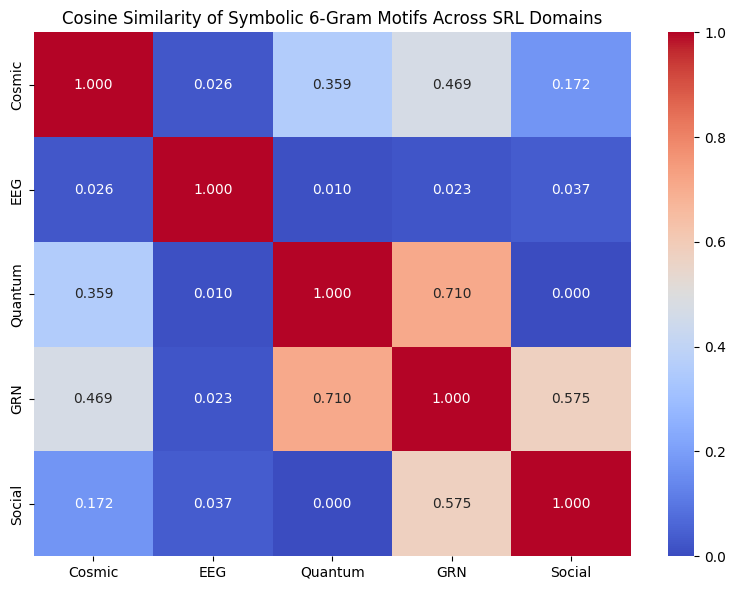

Cosine similarity matrix saved to: /content/drive/MyDrive/SRL_Analysis/similarity/cosine_similarity_matrix.png


In [6]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths
paths = {
    "Cosmic": "/content/drive/MyDrive/SRL_Symbols/cosmic_symbolic_stream.npy",
    "EEG": "/content/drive/MyDrive/SRL_Symbols/eeg_symbolic_stream.npy",
    "Quantum": "/content/drive/MyDrive/SRL_Symbols/quantum_symbolic_stream.npy",
    "GRN": "/content/drive/MyDrive/SRL_Phase2_Biological/symbols/grn_symbolic_stream.npy",
    "Social": "/content/drive/MyDrive/SRL_Phase2_Social/symbols/social_symbolic_stream.npy"
}

# Extract 6-gram frequency vectors
loop_length = 6
loop_vectors = {}
for label, path in paths.items():
    symbols = np.load(path)
    joined = ''.join(symbols)
    loops = [joined[i:i+loop_length] for i in range(len(joined) - loop_length)]
    loop_vectors[label] = Counter(loops)

# Build master vocabulary of all unique 6-grams
all_loops = sorted(set(loop for counter in loop_vectors.values() for loop in counter))

# Create aligned frequency vectors
matrix = []
labels = []
for label in paths:
    vec = [loop_vectors[label].get(loop, 0) for loop in all_loops]
    matrix.append(vec)
    labels.append(label)

# Compute cosine similarity matrix
cos_sim = cosine_similarity(matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim, xticklabels=labels, yticklabels=labels, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Cosine Similarity of Symbolic 6-Gram Motifs Across SRL Domains")
plt.tight_layout()

# Save figure
fig_path = "/content/drive/MyDrive/SRL_Analysis/similarity/cosine_similarity_matrix.png"
os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path)
plt.show()

print(f"Cosine similarity matrix saved to: {fig_path}")